In [4]:
from set_rcParams import set_rcParams
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
set_rcParams()

In [5]:
data_path = "element_study/"


refinements = [0, 1, 2, 3]

pot_l2_errors = []
pot_linf_errors = []

density_l2_errors = []
density_linf_errors = []

x_vals = []
num_trials = 10
for i in range(num_trials):
  curr_dir = f"/run_{i:d}"
  pot_l2_error =[]
  pot_linf_error =[]


  density_l2_error = []
  density_linf_error = []
  for n in refinements:
    temp_path = data_path + curr_dir + f"/{n:d}_refinement.csv"
    data = pd.read_csv(temp_path)

    pot_l2_error.append(data["potential_l2"].to_numpy()[0])
    density_l2_error.append(data["density_l2"].to_numpy()[0])
    x_vals.append(data["h"].to_numpy()[0])
  #
  pot_l2_errors.append(np.array(pot_l2_error))
  density_l2_errors.append(np.array(density_l2_error))

pot_l2_std_1000ppe = np.array(pot_l2_errors).std(axis=0)
density_l2_std_1000ppe = np.array(density_l2_errors).std(axis=0)

pot_l2_errors_1000ppe = np.array(pot_l2_errors).reshape(-1)
density_l2_errors_1000ppe = np.array(density_l2_errors).reshape(-1)

x_vals_1000ppe = np.array(x_vals).reshape(-1)


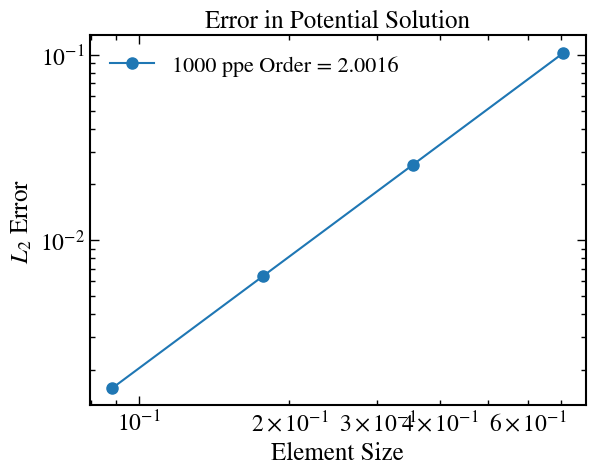

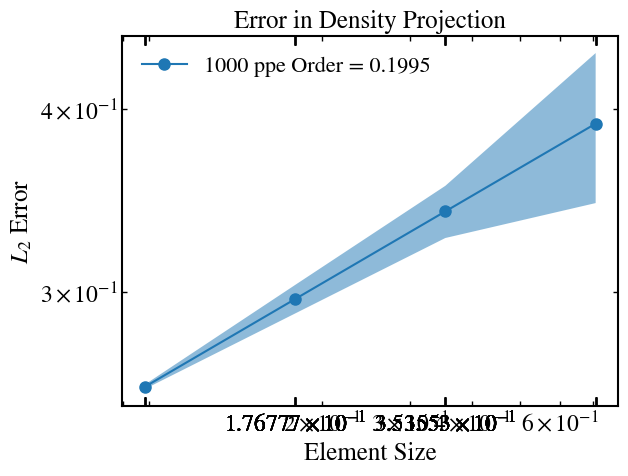

In [6]:

density_l2_model_1000ppe = LinearRegression().fit(np.log(x_vals_1000ppe).reshape((-1, 1)), np.log(np.array(density_l2_errors_1000ppe)))
pot_l2_model_1000ppe = LinearRegression().fit(np.log(x_vals).reshape((-1, 1)), np.log(np.array(pot_l2_errors_1000ppe)))

plot_x_vals = x_vals_1000ppe[:4]
density_l2_fit_1000ppe = np.exp(density_l2_model_1000ppe.predict(np.log(plot_x_vals).reshape(-1, 1)))
pot_l2_fit_1000ppe = np.exp(pot_l2_model_1000ppe.predict(np.log(plot_x_vals).reshape(-1, 1)))



plt.figure()
plt.title("Error in Potential Solution")
plt.ylabel("$L_2$ Error")
plt.xlabel("Element Size")

plt.loglog(plot_x_vals, pot_l2_fit_1000ppe,'-o', label=f"1000 ppe Order = {np.abs(pot_l2_model_1000ppe.coef_[0]):0.4f}")
plt.fill_between(plot_x_vals, pot_l2_fit_1000ppe - pot_l2_std_1000ppe, pot_l2_fit_1000ppe + pot_l2_std_1000ppe, alpha=0.5)
plt.legend()
# ax1.set_xticks(x_vals)
plt.show()

plt.figure()
plt.title("Error in Density Projection")
plt.ylabel("$L_2$ Error")
plt.xlabel("Element Size")

plt.loglog(plot_x_vals, density_l2_fit_1000ppe,'-o', label=f"1000 ppe Order = {np.abs(density_l2_model_1000ppe.coef_[0]):0.4f}")
plt.fill_between(plot_x_vals, density_l2_fit_1000ppe - density_l2_std_1000ppe, density_l2_fit_1000ppe + density_l2_std_1000ppe, alpha=0.5)
plt.legend(loc='upper left')
plt.xticks(x_vals)
plt.show()